In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

import seaborn.apionly as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

%matplotlib inline

In [2]:
LAYING_RAW_DATA_FILE = 'laying_grasps.csv'
STANDING_RAW_DATA_FILE = 'standing_grasps.csv'

In [3]:
laying_raw_df = pd.read_csv(LAYING_RAW_DATA_FILE)
standing_raw_df = pd.read_csv(STANDING_RAW_DATA_FILE)
whole_raw_df = pd.concat([laying_raw_df, standing_raw_df])

whole_raw_df.describe()

,slipped,ff_biotac_1,ff_biotac_2,ff_biotac_3,ff_biotac_4,ff_biotac_5,ff_biotac_6,ff_biotac_7,ff_biotac_8,ff_biotac_9,...,ffj4,mfj1,mfj2,mfj3,mfj4,thj1,thj2,thj3,thj4,thj5
count,2549.000000,2549.000000,2549.000000,2549.000000,2549.000000,2549.000000,2549.000000,2549.000000,2549.000000,2549.000000,...,2549.000000,2549.000000,2549.000000,2549.000000,2549.000000,2549.000000,2549.000000,2549.000000,2549.000000,2549.000000
mean,0.501765,2830.368772,3075.929384,3196.102785,3019.753629,2715.173794,2554.994508,2824.701844,2336.045900,2277.734013,...,-0.002457,0.276731,0.909609,0.454230,0.007649,0.006226,0.659161,0.208783,1.100880,-0.082937
std,0.500095,125.550345,108.155053,530.117536,161.080763,202.028945,239.250934,332.620979,583.571487,710.769351,...,0.015563,0.187840,0.197881,0.162288,0.025765,0.024353,0.053251,0.013578,0.043669,0.170738
min,0.000000,2074.000000,1955.000000,1988.000000,1506.000000,845.000000,1783.000000,368.000000,154.000000,98.000000,...,-0.061761,0.018474,0.465782,0.069760,-0.053829,-0.045752,0.228575,0.160750,1.016740,-0.479484
25%,0.000000,2753.000000,3030.000000,2794.000000,2954.000000,2662.000000,2381.000000,2723.000000,2026.000000,2018.000000,...,-0.011191,0.118426,0.725957,0.310211,-0.009091,-0.011539,0.649343,0.200356,1.067870,-0.221440
50%,1.000000,2842.000000,3094.000000,2988.000000,3046.000000,2771.000000,2542.000000,2901.000000,2483.000000,2504.000000,...,-0.003021,0.200376,0.977605,0.460124,0.001119,0.002227,0.668651,0.209902,1.090760,-0.087077
75%,1.000000,2924.000000,3143.000000,3954.000000,3126.000000,2844.000000,2748.000000,3028.000000,2819.000000,2812.000000,...,0.005113,0.445097,1.084480,0.577948,0.022175,0.016884,0.685965,0.218086,1.130530,0.053396
max,1.000000,3112.000000,3246.000000,3975.000000,3311.000000,2944.000000,3104.000000,3215.000000,2964.000000,3020.000000,...,0.063842,0.659297,1.198030,0.885681,0.106736,0.082056,0.729736,0.242082,1.289330,0.356695


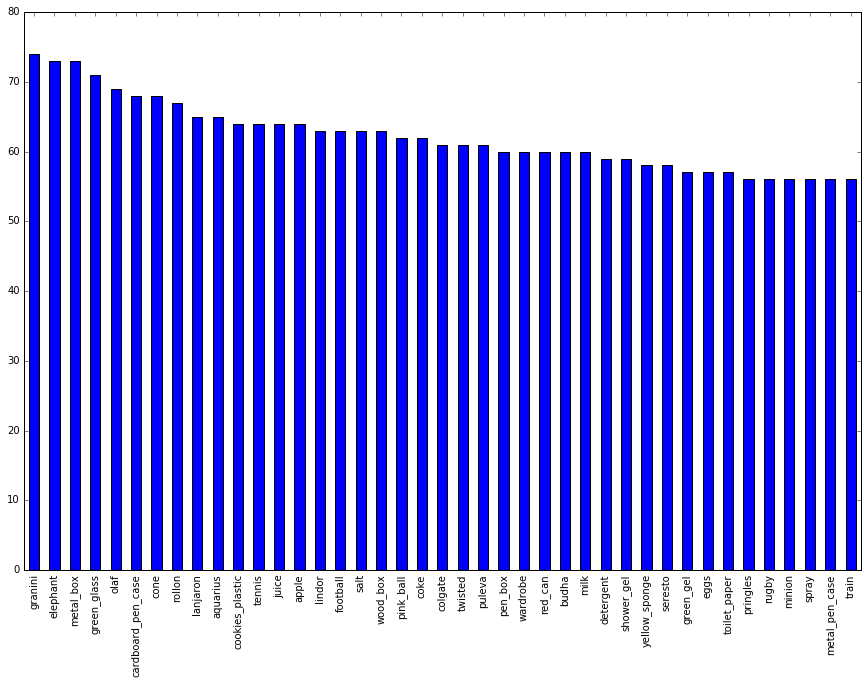

In [4]:
whole_raw_df['object'].value_counts().plot(kind='bar', figsize=(15, 10))

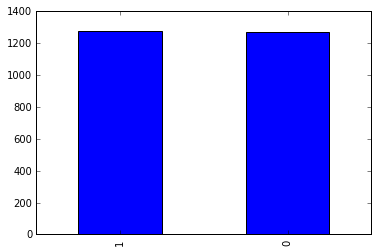

In [5]:
whole_raw_df['slipped'].value_counts().plot(kind='bar')

In [6]:
labels = whole_raw_df['slipped'].values
tactiles = whole_raw_df[['ff_biotac_1', 'ff_biotac_2', 'ff_biotac_3', 'ff_biotac_4', 'ff_biotac_5', 
                   'ff_biotac_6', 'ff_biotac_7', 'ff_biotac_8', 'ff_biotac_9', 'ff_biotac_10', 'ff_biotac_11', 
                   'ff_biotac_12', 'ff_biotac_13', 'ff_biotac_14', 'ff_biotac_15', 'ff_biotac_16', 'ff_biotac_17', 
                   'ff_biotac_18', 'ff_biotac_19', 'ff_biotac_20', 'ff_biotac_21', 'ff_biotac_22', 'ff_biotac_23', 
                   'ff_biotac_24', 'mf_biotac_1', 'mf_biotac_2', 'mf_biotac_3', 'mf_biotac_4', 'mf_biotac_5', 
                   'mf_biotac_6', 'mf_biotac_7', 'mf_biotac_8', 'mf_biotac_9', 'mf_biotac_10', 'mf_biotac_11', 
                   'mf_biotac_12', 'mf_biotac_13', 'mf_biotac_14', 'mf_biotac_15', 'mf_biotac_16', 'mf_biotac_17', 
                   'mf_biotac_18', 'mf_biotac_19', 'mf_biotac_20', 'mf_biotac_21', 'mf_biotac_22', 'mf_biotac_23', 
                   'mf_biotac_24', 'th_biotac_1', 'th_biotac_2', 'th_biotac_3', 'th_biotac_4', 'th_biotac_5', 
                   'th_biotac_6', 'th_biotac_7', 'th_biotac_8', 'th_biotac_9', 'th_biotac_10', 'th_biotac_11', 
                   'th_biotac_12', 'th_biotac_13', 'th_biotac_14', 'th_biotac_15', 'th_biotac_16', 'th_biotac_17', 
                   'th_biotac_18', 'th_biotac_19', 'th_biotac_20', 'th_biotac_21', 'th_biotac_22', 'th_biotac_23', 
                   'th_biotac_24']].values

In [7]:
print tactiles.shape

(2549, 72)


In [8]:
tactiles = (tactiles - np.mean(tactiles)) / (np.std(tactiles))
#tactiles = (tactiles - np.min(tactiles)) / (np.max(tactiles) - np.min(tactiles))

# TESTING SVM

In [11]:
folds = 10
kfold = StratifiedKFold(n_splits=folds, shuffle=True)

cv_accuracy = []
cv_precision = []
cv_recall = []
cv_f1_score = []

for index, (train_indices, val_indices) in enumerate(kfold.split(tactiles, labels)):    
    print "+ Training fold " + str(index + 1) + "/" + str(folds)

    # split data
    tactiles_train, tactiles_val = tactiles[train_indices], tactiles[val_indices]
    labels_train, labels_val = labels[train_indices], labels[val_indices]  

    # train
    param_grid = {'C': [0.01, 0.1, 1, 1e1, 1e2, 1e3, 5e3], 'gamma': ['auto', 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
    svm = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
    
    print svm
    
    svm.fit(tactiles_train, labels_train)
    
    # evaluate
    print "+ Evaluating cv-fold..."
    
    predictions = svm.predict(tactiles_val)
    
    accuracy = accuracy_score(labels_val, predictions)
    [precision, recall, f1_score, _] = precision_recall_fscore_support(labels_val, predictions, average='binary', 
                                                                       pos_label=1)
    cv_accuracy.append(accuracy * 100)
    cv_precision.append(precision * 100)
    cv_recall.append(recall * 100)
    cv_f1_score.append(f1_score * 100)

    print svm.best_params_
    print "->accuracy:", accuracy * 100
    print "->precision:", precision * 100
    print "->recall:", recall * 100
    print "->f1_score:", f1_score * 100
    print "\n"

print "\n@ Final cross-validation score @"
print np.mean(cv_accuracy), "+/-", np.std(cv_accuracy)
print np.mean(cv_precision), "+/-", np.std(cv_precision)
print np.mean(cv_recall), "+/-", np.std(cv_recall)
print np.mean(cv_f1_score), "+/-", np.std(cv_f1_score)

+ Training fold 1/10
GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10.0, 100.0, 1000.0, 5000.0], 'gamma': ['auto', 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)
+ Evaluating cv-fold...
{'C': 1, 'gamma': 0.01}
->accuracy: 87.0588235294
->precision: 89.2561983471
->recall: 84.375
->f1_score: 86.7469879518


+ Training fold 2/10
GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None

# TESTING RF

In [12]:
folds = 10
kfold = StratifiedKFold(n_splits=folds, shuffle=True)

cv_accuracy = []
cv_precision = []
cv_recall = []
cv_f1_score = []

for index, (train_indices, val_indices) in enumerate(kfold.split(tactiles, labels)):    
    print "+ Training fold " + str(index + 1) + "/" + str(folds)

    # split data
    tactiles_train, tactiles_val = tactiles[train_indices], tactiles[val_indices]
    labels_train, labels_val = labels[train_indices], labels[val_indices]  

    # train
    param_grid = {'n_estimators': [10, 50, 100, 150, 200], 'max_depth': [None, 5, 10, 15, 20, 25, 30]}
    rf = GridSearchCV(RandomForestClassifier(oob_score=False), param_grid)
    
    print rf
    
    rf.fit(tactiles_train, labels_train)
    
    # evaluate
    print "+ Evaluating cv-fold..."
    
    predictions = rf.predict(tactiles_val)
    
    accuracy = accuracy_score(labels_val, predictions)
    [precision, recall, f1_score, _] = precision_recall_fscore_support(labels_val, predictions, average='binary', 
                                                                       pos_label=1)
    cv_accuracy.append(accuracy * 100)
    cv_precision.append(precision * 100)
    cv_recall.append(recall * 100)
    cv_f1_score.append(f1_score * 100)

    print rf.best_params_
    print "->accuracy:", accuracy * 100
    print "->precision:", precision * 100
    print "->recall:", recall * 100
    print "->f1_score:", f1_score * 100
    print "\n"

print "\n@ Final cross-validation score @"
print np.mean(cv_accuracy), "+/-", np.std(cv_accuracy)
print np.mean(cv_precision), "+/-", np.std(cv_precision)
print np.mean(cv_recall), "+/-", np.std(cv_recall)
print np.mean(cv_f1_score), "+/-", np.std(cv_f1_score)

+ Training fold 1/10
GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 150, 200], 'max_depth': [None, 5, 10, 15, 20, 25, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)
+ Evaluating cv-fold...
{'n_estimators': 150, 'max_depth': 20}
->accuracy: 92.9411764706
->precision: 92.96875
->recall: 92.96875
->f1_score: 92.96875


+ Training fold 2/10
GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestC

+ Evaluating cv-fold...
{'n_estimators': 200, 'max_depth': 25}
->accuracy: 94.4881889764
->precision: 95.2
->recall: 93.7007874016
->f1_score: 94.4444444444



@ Final cross-validation score @
92.6645051721 +/- 1.51671260673
93.6199818654 +/- 2.48838809341
91.7138287402 +/- 2.31856273661
92.6198013995 +/- 1.52209751772


# TESTING KNN

In [10]:
folds = 10
kfold = StratifiedKFold(n_splits=folds, shuffle=True)

cv_accuracy = []
cv_precision = []
cv_recall = []
cv_f1_score = []

for index, (train_indices, val_indices) in enumerate(kfold.split(tactiles, labels)):    
    print "+ Training fold " + str(index + 1) + "/" + str(folds)

    # split data
    tactiles_train, tactiles_val = tactiles[train_indices], tactiles[val_indices]
    labels_train, labels_val = labels[train_indices], labels[val_indices]  

    # train
    param_grid = {'n_neighbors' : [1, 3, 5, 7, 9, 11, 13], }
    neigh = GridSearchCV(KNeighborsClassifier(), param_grid)
    
    print neigh
    
    neigh.fit(tactiles_train, labels_train)
    
    # evaluate
    print "+ Evaluating cv-fold..."
    
    predictions = neigh.predict(tactiles_val)
    
    accuracy = accuracy_score(labels_val, predictions)
    [precision, recall, f1_score, _] = precision_recall_fscore_support(labels_val, predictions, average='binary', 
                                                                       pos_label=1)
    cv_accuracy.append(accuracy * 100)
    cv_precision.append(precision * 100)
    cv_recall.append(recall * 100)
    cv_f1_score.append(f1_score * 100)
    
    print neigh.best_params_
    print "->accuracy:", accuracy * 100
    print "->precision:", precision * 100
    print "->recall:", recall * 100
    print "->f1_score:", f1_score * 100
    print "\n"

print "\n@ Final cross-validation score @"
print np.mean(cv_accuracy), "+/-", np.std(cv_accuracy)
print np.mean(cv_precision), "+/-", np.std(cv_precision)
print np.mean(cv_recall), "+/-", np.std(cv_recall)
print np.mean(cv_f1_score), "+/-", np.std(cv_f1_score)

+ Training fold 1/10
GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)
+ Evaluating cv-fold...
{'n_neighbors': 11}
->accuracy: 85.8823529412
->precision: 82.3943661972
->recall: 91.40625
->f1_score: 86.6666666667


+ Training fold 2/10
GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13]},
       pre_dispatch='2*n_jobs', refit=True, return_trai